In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib nbagg

In [3]:
def structData(fname):
    arr = np.loadtxt(fname)
    xi_ = arr[:,3]
    for j,xij in enumerate(xi_):
        if xij!=xi_[0]:
            break
    if j==len(xi_)-1:
        j +=1
    u__ = arr[:,-1].reshape(-1,j)
    xi_ = xi_.reshape(-1,j)[:,0]
    epos_ = arr[:j,:3]
    return xi_, u__, epos_

In [4]:
def USpecAnalysis(u_spec_, xi_, mode='t', tmin=0, tmax=1):
    """
    In t mode, show the integrand(t), t = xi/(1+xi) \in [0,1] by default
    In xi mode, show the integrand(xi), xi \in [0,+\infty) by default
    """
    if mode == 't':
        amin, amax = (tmin,tmax)
        a_ = xi_/(1+xi_)
    elif mode == 'xi':
        amin, amax = (tmin/(1-tmin), np.inf if tmax==1 else tmax/(1-tmax))
        a_ = xi_
    else:
        raise ValueError("Only Two options for `mode`: 't' or 'xi'. ")
    idx_ = np.logical_and(a_>=amin, a_<=amax)
    a_ = a_[idx_]
    u_spec_ = u_spec_[idx_]
    idx_ = np.argsort(a_)
    a_ = a_[idx_]
    u_spec_ = u_spec_[idx_]
    print("#Xi =", a_.size)
    if mode == 't':
        jac_ = ((1-a_)**(-2)).reshape(-1,1)
        u_spec_ *= jac_
    plt.plot(a_, u_spec_)
    plt.ylabel("Integrand (neV)")
    if mode == 't':
        plt.xlabel(r"$t = \frac{\xi/\omega_0}{1+\xi/\omega_0}$")
    else:
        plt.xlabel(r"$\xi/\omega_0$")
        plt.xscale('log')
    plt.subplots_adjust(left=0.16,right=0.99, top=0.99)
    return a_, u_spec_

In [5]:
def plotLateralCP(x_, pot_, n_units=1):
    xx = x_
    xx = np.concatenate((-xx[::-1],xx[:-1]))

    pot = pot_
    pot = np.concatenate((pot[::-1],pot[:-1]))

    if n_units>1:
        L = 2*epos_[-1,0]
        xx = np.concatenate(tuple([xx + L*j for j in range(n_units)]))
        pot = np.tile(pot, n_units)
    plt.plot(xx, pot)
    plt.xlabel("x/um")
    plt.ylabel("U/neV")
    plt.title("z=%.2f um , y=0"%(epos_[0,2]))

## PECPlate

<IPython.core.display.Javascript object>


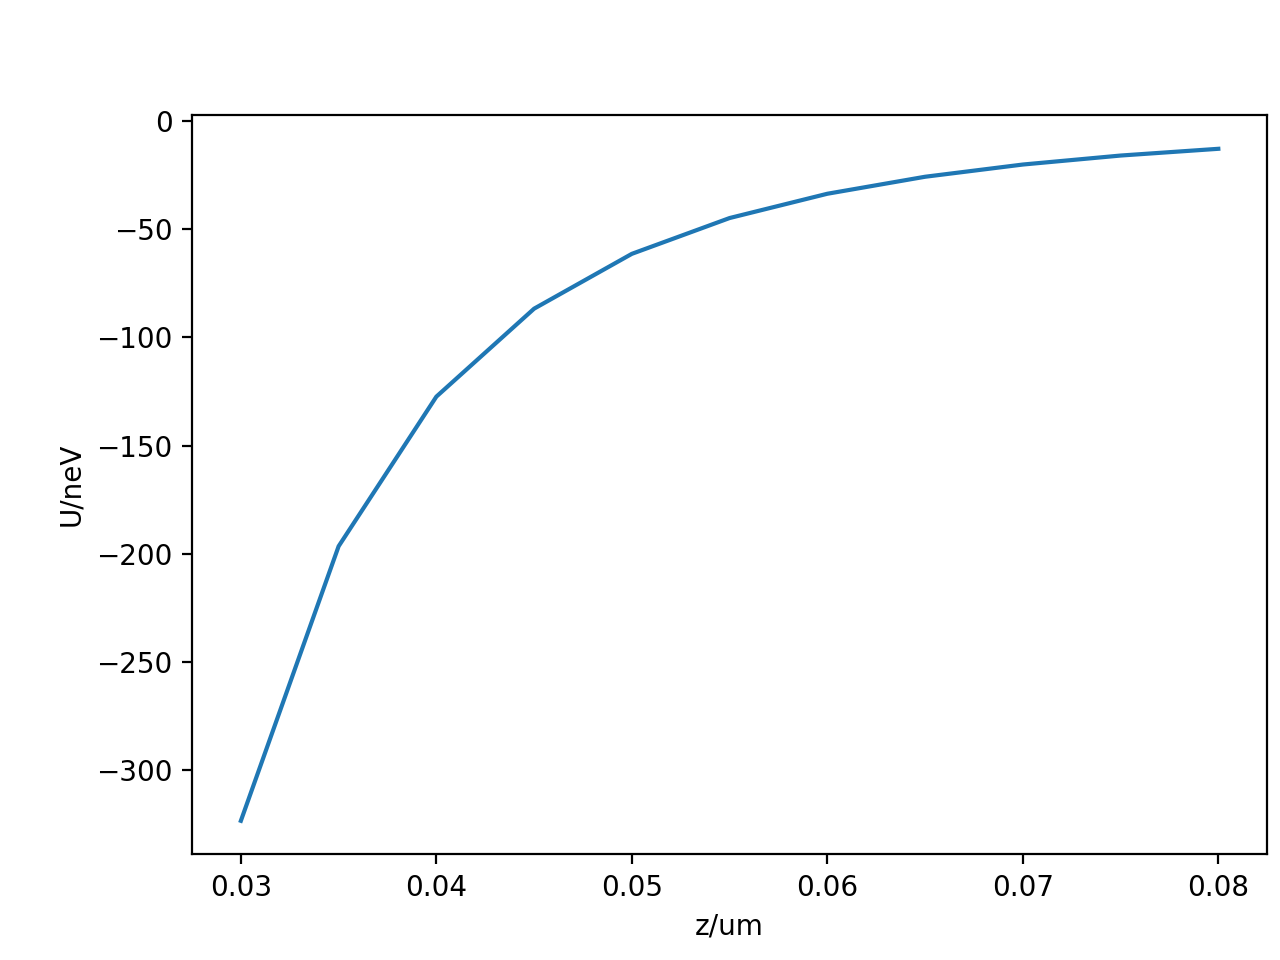

In [6]:
PECout =  np.loadtxt("analyticalDGF4/PECPlate.out")
plt.plot(PECout[:,2], PECout[:,3])
plt.xlabel('z/um')
plt.ylabel('U/neV')
plt.subplots_adjust(right=0.99,left=0.15)

In [7]:
xi_, u__, epos_ = structData("analyticalDGF4/PECPlate.byXi")

#Xi = 64


<IPython.core.display.Javascript object>


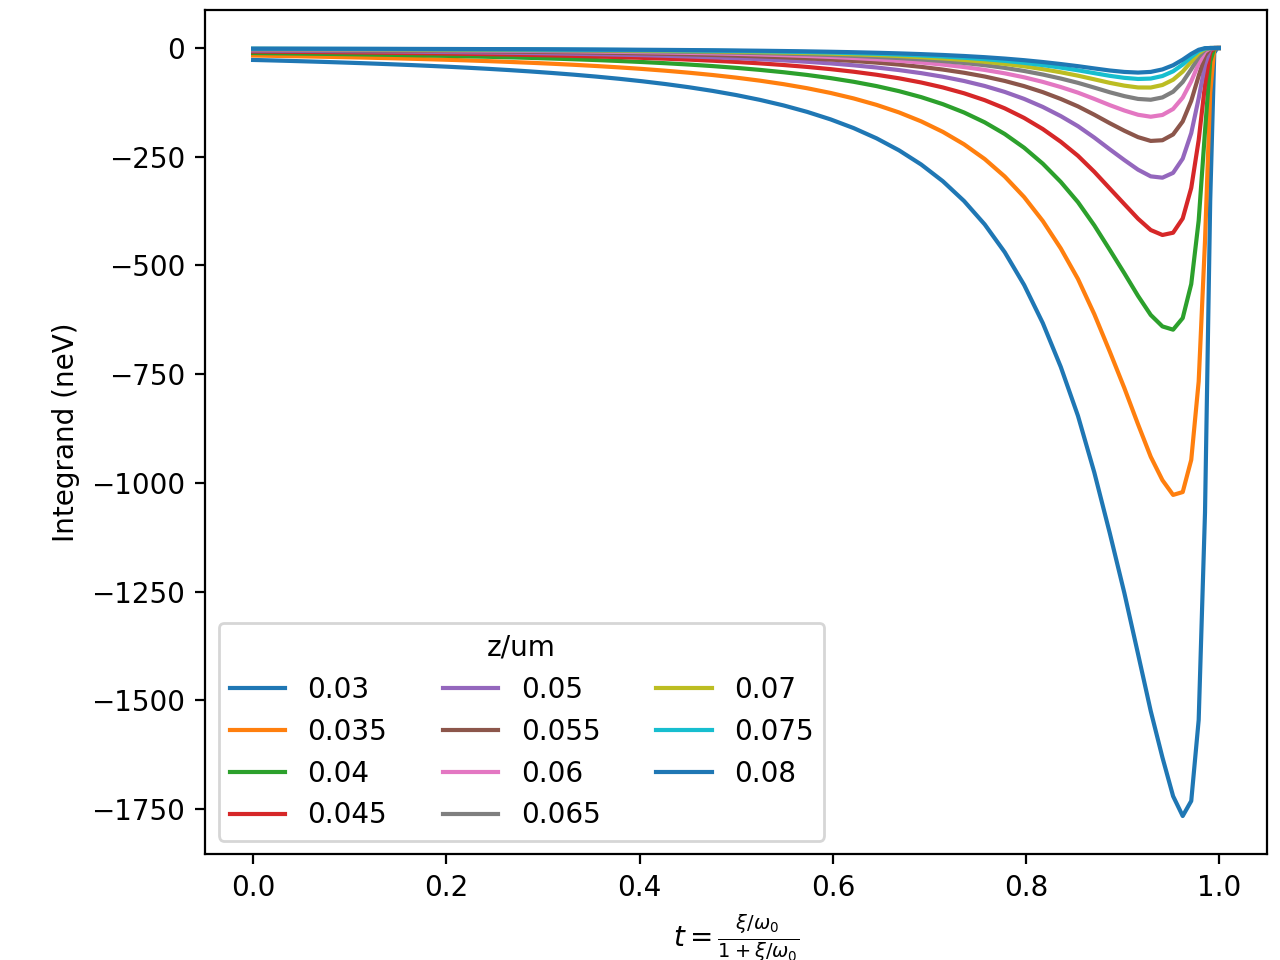

In [8]:
t_, u_spec = USpecAnalysis(u__, xi_)
plt.legend(epos_[:,2],title='z/um', ncol=3)

In [9]:
U_zscan = np.trapz(u_spec, t_,axis=0)

<IPython.core.display.Javascript object>


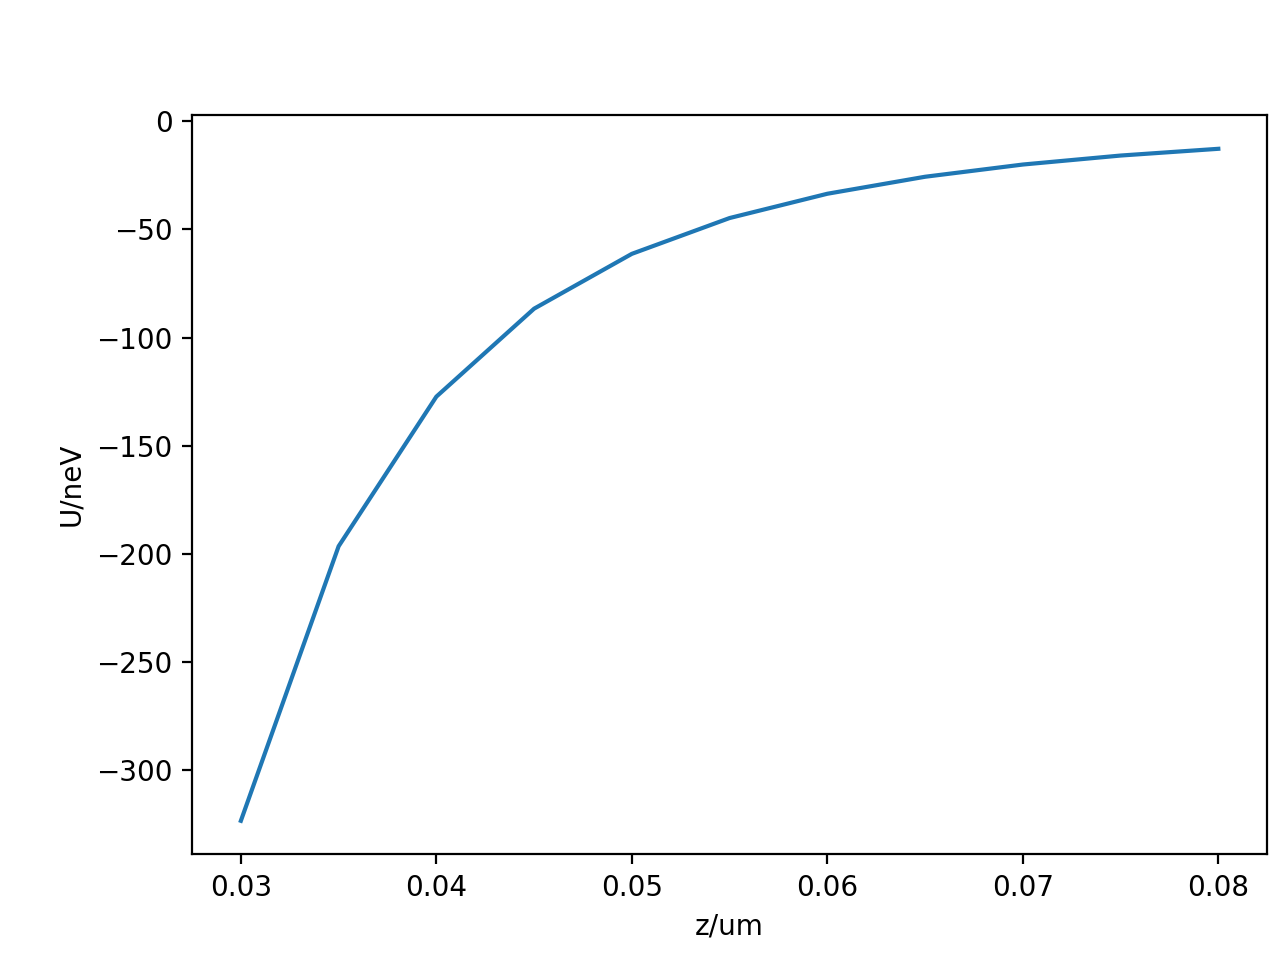

In [10]:
plt.plot(epos_[:,2], U_zscan)
plt.xlabel('z/um')
plt.ylabel('U/neV')
plt.subplots_adjust(right=0.99,left=0.15)

## PEC L=0.5um, Mesh resolution 0.025um

In [11]:
xi_, u__, epos_ = structData("L0P5_2640/PECSlab_2640.byXi")

#Xi = 64


<IPython.core.display.Javascript object>


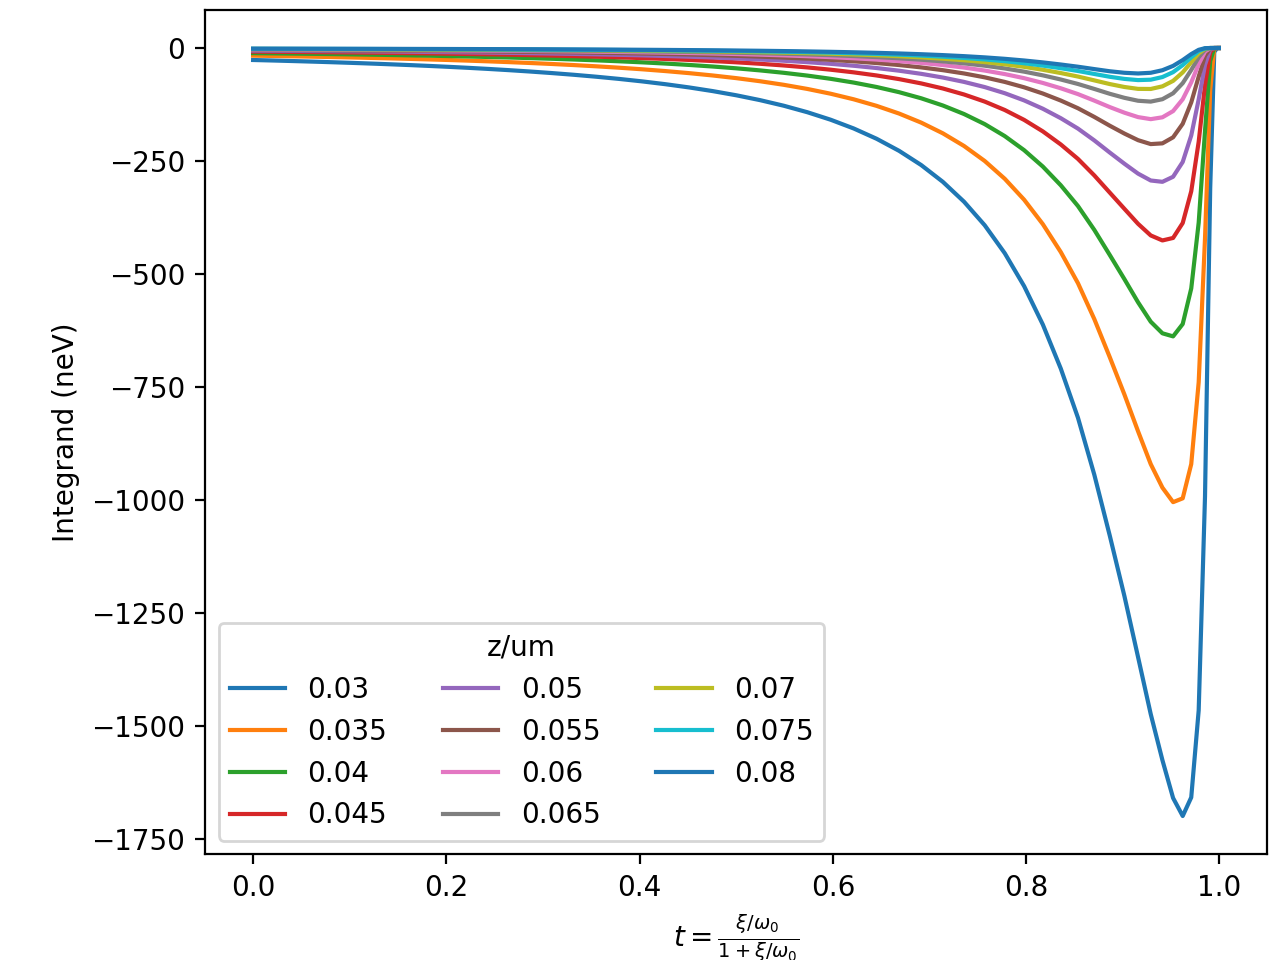

In [15]:
t_, u_spec = USpecAnalysis(u__[:,1:], xi_)
plt.legend(epos_[1:,2],title='z/um', ncol=3)

In [16]:
U_zscan_1 = np.trapz(u_spec, t_,axis=0)

### Relative error w.r.t. outcome from `--PECPlate`

In [22]:
(U_zscan - U_zscan_1)/U_zscan

array([0.03623403, 0.02275279, 0.01560768, 0.01172968, 0.00968318,
       0.00876556, 0.00861627, 0.00904183, 0.00993485, 0.01123489,
       0.01290792])

### Most accurate at 0.05um<=z<=0.07um, rel.err.<1e-3